## Collatz analysis notebook

In [3]:
"""
This notebook uses techniques of mathematical analysis to investigate a function
that predicts the alpha (power of two) for a cycle with a specific length
for a certain k-factor.
"""

# Fix possible import problems
import sys
sys.path.append("..")

# Imports
from pathlib import Path
from math import log2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collatz import cycles


# Helper functions
def _predict_cycle_alpha(k_factor, cycle_lengths):
    result_list = []
    for i in cycle_lengths:
        result_list.append(cycles.predict_cycle_alpha(k_factor, i))
    return result_list


# Configuration
k = 3
max_value = 15

EXPORT_DATA = True
DATA_PATH = Path.cwd().parent.as_posix() + "/data/"
PIC_PATH = DATA_PATH + "analysis.png"
CSV_PATH = DATA_PATH + "analysis.csv"

# Analyse the data
first_fraction = 1
fractions = np.array(range(first_fraction, first_fraction + 2 * max_value, 2))
fractions = k + 1/fractions

analysis_frame = pd.DataFrame({"n": range(1, max_value+1)})
analysis_frame['alpha_cycle'] = _predict_cycle_alpha(k, analysis_frame['n'])
analysis_frame['2_alpha_cycle'] = 2 ** analysis_frame['alpha_cycle']

analysis_frame['cycle_min'] = k ** analysis_frame['n']
analysis_frame['cycle_min_log2'] = analysis_frame['cycle_min'].apply(log2)

analysis_frame['cycle_max'] = fractions.cumprod()
analysis_frame['cycle_max_log2'] = analysis_frame['cycle_max'].apply(log2)

analysis_frame['cycle_possible'] = analysis_frame['alpha_cycle'] >= analysis_frame['cycle_min_log2']
analysis_frame['cycle_possible'] &= analysis_frame['alpha_cycle'] <= analysis_frame['cycle_max_log2']

# Print results
print("K:", k, "\n")

print_frame = analysis_frame[[
    'n', 'alpha_cycle', 'cycle_min_log2', "cycle_max_log2", "cycle_possible"]]

print(print_frame.to_string(index=False))

K: 3 

  n  alpha_cycle  cycle_min_log2  cycle_max_log2  cycle_possible
  1            2        1.584963        2.000000            True
  2            4        3.169925        3.736966           False
  3            5        4.754888        5.415037            True
  4            7        6.339850        7.067114            True
  5            8        7.924813        8.704544            True
  6           10        9.509775       10.332575            True
  7           12       11.094738       11.954064           False
  8           13       12.679700       13.570735            True
  9           15       14.264663       15.183712            True
 10           16       15.849625       16.793765            True
 11           18       17.434588       18.401448            True
 12           20       19.019550       20.007169            True
 13           21       20.604513       21.611240            True
 14           23       22.189475       23.213905            True
 15           24  

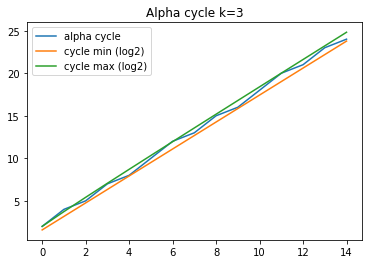

In [4]:
# Plot results

# Predicted alpha vs cycle min and max
plt.figure()
plt.title("Alpha cycle " + "k=" + str(k))
plt.plot(analysis_frame["alpha_cycle"], label='alpha cycle')
plt.plot(analysis_frame["cycle_min_log2"], label="cycle min (log2)")
plt.plot(analysis_frame["cycle_max_log2"], label="cycle max (log2)")
plt.legend()

# Export results
if EXPORT_DATA:
    plt.savefig(PIC_PATH)
    print_frame.to_csv(CSV_PATH, index=False)

plt.show()